# Code Challenge

ModuleNotFoundError: No module named 'keras_tuner'

In [138]:
!pip install keras-tuner --upgrade

     -------------------------------------- 128.9/128.9 kB 2.6 MB/s eta 0:00:00


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping



from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

import keras_tuner
import keras



# a) Generating a dataset. 

Use make_moons to simulate a data set: 
```python
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
```
After you have generated it, check the shape, print out some rows of it and also do a plot: 

```python
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')
```

In [132]:
data = make_moons(n_samples=10000, noise=0.4, random_state=42)
print(data)

(array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]]), array([1, 0, 0, ..., 1, 0, 1], dtype=int64))


In [128]:
dataf = pd.DataFrame(data={'Feature1': data[0][:, 0], 'Feature2': data[0][:, 1], 'target': data[1]})
print(dataf)

      Feature1  Feature2  target
0     0.940291  0.122306       1
1     0.124540 -0.424775       0
2     0.261988  0.508414       0
3    -0.495238  0.072589       0
4    -0.879413  0.549373       0
...        ...       ...     ...
9995  0.406096  0.389485       1
9996  0.188299  0.755326       1
9997 -0.241780  0.209572       1
9998  0.906796  0.549582       0
9999  2.088371 -0.050507       1

[10000 rows x 3 columns]


In [133]:
dataf.head()

,Feature1,Feature2,target
0,0.940291,0.122306,1
1,0.124540,-0.424775,0
2,0.261988,0.508414,0
3,-0.495238,0.072589,0
4,-0.879413,0.549373,0


In [134]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  10000 non-null  float64
 1   Feature2  10000 non-null  float64
 2   target    10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [129]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [130]:
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y
 
print(df.head())

   feature_1  feature_2  target
0   0.940291   0.122306       1
1   0.124540  -0.424775       0
2   0.261988   0.508414       0
3  -0.495238   0.072589       0
4  -0.879413   0.549373       0


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Alt split

In [146]:
X_train_full, X_test2, y_train_full, y_test2 = train_test_split(X, y, test_size=0.2, random_state=40)
X_train2, X_val, y_train2, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=36)

In [14]:
X_train.shape

(8000, 2)

##EDA

In [4]:
print(np.shape(X))

(10000, 2)


In [5]:
X

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [16]:
y.shape

(10000,)

In [17]:
y_train.shape

(8000,)

In [19]:
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

Text(0.5, 1.0, 'Data generated by make_moons() function')

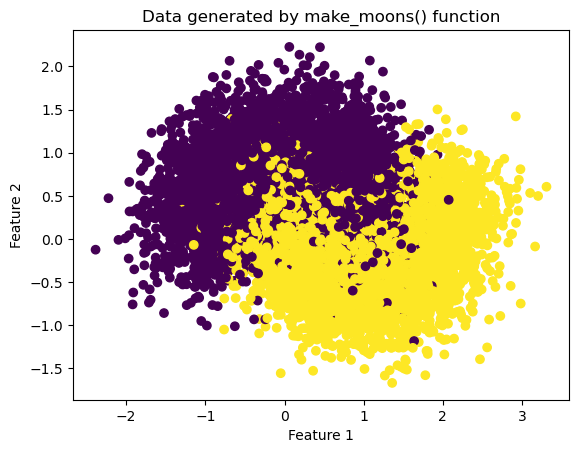

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')

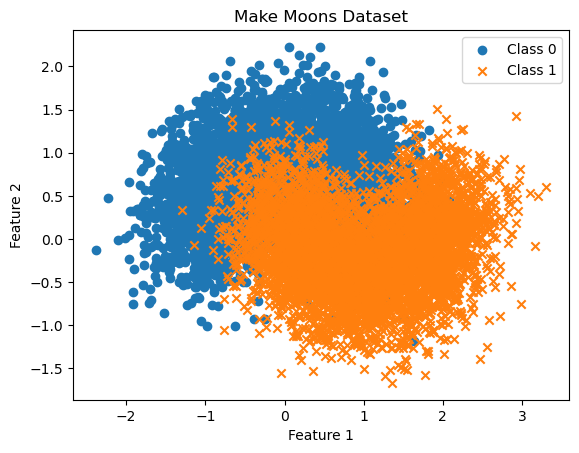

In [49]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker='x')
plt.title("Make Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [41]:
tree_clf = DecisionTreeClassifier()

# Finding the best hyperparameter through GridSearch.
hyper_params = {'max_depth':(None, 1, 2, 5, 10)}
clf = GridSearchCV(tree_clf, hyper_params)

clf.fit(X_train, y_train)
clf_pred = clf.predict(X_val)

NameError: name 'X_val' is not defined

In [ ]:
print(clf.best_params_)
pd.DataFrame(clf.cv_results_)

# b) Now you will do some modelling from beginning to end meaning that you will have to decide how to split your data, what model to use and so on.
# Create 1 model with Scikit-learn. 
# Create 1 deep learning model.
# Write down a short summary of your conclusions. 

In [57]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [82]:



#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {round(np.mean(cv_scores),3)}")

# Optionally, fit the model on the entire dataset
#rf_classifier.fit(X, y)

Cross-Validation Scores: [0.831875 0.8375   0.853125 0.833125 0.85375 ]
Mean Accuracy: 0.842


In [59]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
test_accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy on Test Data: {test_accuracy}")

Accuracy on Test Data: 0.8505


Deep Learning

In [22]:
n_cols = X_train.shape[1]
print(n_cols)

2


In [122]:


model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
# In the last layer (output layer) we have 3 nodes since 3 classes to predict and therefore use softmax. 
model.add(Dense(1, activation = 'sigmoid'))

In [123]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [124]:
early_stopping_monitor = EarlyStopping(patience = 3)
model_trained = model.fit(X_train, y_train, validation_split = 0.2, epochs = 30, callbacks = [early_stopping_monitor])

Epoch 1/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3814 - accuracy: 0.8331 - val_loss: 0.3545 - val_accuracy: 0.8450
Epoch 2/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8550 - val_loss: 0.3349 - val_accuracy: 0.8594
Epoch 3/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8573 - val_loss: 0.3248 - val_accuracy: 0.8594
Epoch 4/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 0.8622 - val_loss: 0.3232 - val_accuracy: 0.8625
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3231 - accuracy: 0.8619 - val_loss: 0.3393 - val_accuracy: 0.8506
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3235 - accuracy: 0.8595 - val_loss: 0.3217 - val_accuracy: 0.8619
Epoch 7/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3210 - accuracy: 0.8623 - val_loss: 0.3259 - val_accuracy: 0.8606
Epoch 

In [125]:
print(model_trained.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [126]:
loss, accuracy = model.evaluate(X_test, y_test)
loss_r, accuracy_r = round(loss,3), round(accuracy,3)

print(f"Loss: {loss_r}, Accuracy: {accuracy_r}")

63/63 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8705
Loss: 0.297, Accuracy: 0.871


# If you have time, try to tune hyperparameters with KerasTuner: https://keras.io/keras_tuner/ .

In [177]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [10, 50, 100]),
      activation='relu'))
  model.add(keras.layers.Dense(100, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [165]:
build_model(keras_tuner.HyperParameters())

In [151]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5)


Reloading Tuner from .\untitled_project\tuner0.json


In [152]:
tuner.search(X_train2, y_train2, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]


In [149]:
loss, accuracy = turner.evaluate(X_test2, y_test2)
loss_r, accuracy_r = round(loss,3), round(accuracy,3)

print(f"Loss: {loss_r}, Accuracy: {accuracy_r}")

NameError: name 'turner' is not defined

In [178]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="Patrik1",
)


In [179]:
tuner.search_space_summary()


Search space summary
Default search space size: 1
units (Choice)
{'default': 10, 'conditions': [], 'values': [10, 50, 100], 'ordered': True}


In [180]:
tuner.search(X_train, y_train, epochs=2, validation_data=(X_val, y_val))


Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.8502083420753479

Best val_accuracy So Far: 0.8570833206176758
Total elapsed time: 00h 00m 24s


In [181]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 2, 2))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2, 100)            300       
                                                                 
 dense_1 (Dense)             (None, 2, 100)            10100     
                                                                 
 dense_2 (Dense)             (None, 2, 1)              101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [182]:
tuner.results_summary()


Results summary
Results in my_dir\Patrik1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 100
Score: 0.8570833206176758

Trial 2 summary
Hyperparameters:
units: 50
Score: 0.8502083420753479

Trial 1 summary
Hyperparameters:
units: 10
Score: 0.8441666960716248
